<a href="https://colab.research.google.com/github/Thahira8/assesmnt/blob/main/exit_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
file_path = '/content/partpdf_1758712161434_netflix_titles.xlsx'
sheet_names = ['netflix_titles', 'netflix_titles_cast', 'netflix_titles_directors', 'netflix_titles_category', 'netflix_titles_countries']
dfs = {name: pd.read_excel(file_path, sheet_name=name) for name in sheet_names}
master_df = dfs['netflix_titles']
for name in sheet_names[1:]:
    master_df = master_df.merge(dfs[name], on='show_id', how='left')
print(master_df.head())


  duration_minutes duration_seasons   type  \
0               90              NaN  Movie   
1               90              NaN  Movie   
2               90              NaN  Movie   
3               90              NaN  Movie   
4               90              NaN  Movie   

                                     title           date_added  release_year  \
0  Norm of the North: King Sized Adventure  2019-09-09 00:00:00        2019.0   
1  Norm of the North: King Sized Adventure  2019-09-09 00:00:00        2019.0   
2  Norm of the North: King Sized Adventure  2019-09-09 00:00:00        2019.0   
3  Norm of the North: King Sized Adventure  2019-09-09 00:00:00        2019.0   
4  Norm of the North: King Sized Adventure  2019-09-09 00:00:00        2019.0   

  rating                                        description     show_id  \
0  TV-PG  Before planning an awesome wedding for his gra...  81145628.0   
1  TV-PG  Before planning an awesome wedding for his gra...  81145628.0   
2  TV-PG  B

ANALYTICAL ANSWER = I use left join to merge the main 'netflix_titles' with others. This keeps all titles from the main list, even if some don't have matching informtion in other sheets. A left join is best because it ensures no titles are lost during merge.


In [ ]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139946 entries, 0 to 139945
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_minutes  98561 non-null   object 
 1   duration_seasons  41387 non-null   object 
 2   type              139945 non-null  object 
 3   title             139945 non-null  object 
 4   date_added        139785 non-null  object 
 5   release_year      139944 non-null  float64
 6   rating            139870 non-null  object 
 7   description       139943 non-null  object 
 8   show_id           139942 non-null  float64
 9   cast              138456 non-null  object 
 10  director          101031 non-null  object 
 11  listed_in         139942 non-null  object 
 12  country           134152 non-null  object 
dtypes: float64(2), object(11)
memory usage: 13.9+ MB


In [ ]:
master_df.to_csv('combined_dataset.csv', index=False)


In [ ]:
master_df.shape

(139946, 13)

In [ ]:
df = pd.read_csv('/content/combined_dataset.csv')
df['director'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df.dropna(subset=['date_added'], inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
missing_summary = df.isnull().sum()
print(df.head())
print("\nMissing values summary:\n", missing_summary)


/tmp/ipython-input-3462718370.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/combined_dataset.csv')
/tmp/ipython-input-3462718370.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3462718370.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This in

  duration_minutes duration_seasons   type  \
0               90              NaN  Movie   
1               90              NaN  Movie   
2               90              NaN  Movie   
3               90              NaN  Movie   
4               90              NaN  Movie   

                                     title date_added  release_year rating  \
0  Norm of the North: King Sized Adventure 2019-09-09        2019.0  TV-PG   
1  Norm of the North: King Sized Adventure 2019-09-09        2019.0  TV-PG   
2  Norm of the North: King Sized Adventure 2019-09-09        2019.0  TV-PG   
3  Norm of the North: King Sized Adventure 2019-09-09        2019.0  TV-PG   
4  Norm of the North: King Sized Adventure 2019-09-09        2019.0  TV-PG   

                                         description     show_id  \
0  Before planning an awesome wedding for his gra...  81145628.0   
1  Before planning an awesome wedding for his gra...  81145628.0   
2  Before planning an awesome wedding for his gra.

ANALYTICAL ANSWER: To handle missing country data, I filled the null values with the placeholder 'Unknown'. This approach preserves the dataset's completeness, ensuring no records are lost during analysis. Dropping rows could eliminate potentially valuable information, while imputation isn't ideal due to the categorical nature of the data. Using 'Unknown' allows for consistent handling and easy filtering during further analysis.


In [ ]:
df = df.dropna(subset=['cast'])
df['cast'] = df['cast'].str.split(',').apply(lambda x: [i.strip() for i in x])
exploded_df = df.explode('cast')
print(exploded_df.head())


  duration_minutes duration_seasons   type  \
0               90              NaN  Movie   
1               90              NaN  Movie   
2               90              NaN  Movie   
3               90              NaN  Movie   
4               90              NaN  Movie   

                                     title date_added  release_year rating  \
0  Norm of the North: King Sized Adventure 2019-09-09        2019.0  TV-PG   
1  Norm of the North: King Sized Adventure 2019-09-09        2019.0  TV-PG   
2  Norm of the North: King Sized Adventure 2019-09-09        2019.0  TV-PG   
3  Norm of the North: King Sized Adventure 2019-09-09        2019.0  TV-PG   
4  Norm of the North: King Sized Adventure 2019-09-09        2019.0  TV-PG   

                                         description     show_id  \
0  Before planning an awesome wedding for his gra...  81145628.0   
1  Before planning an awesome wedding for his gra...  81145628.0   
2  Before planning an awesome wedding for his gra.

In [18]:
exploded_df.to_csv('exploded_cast_dataset.csv', index=False)



ANALYTICAL ANSWER: Exploding the `cast` or `listed_in` column enables granular analysis by converting multi-value strings into individual rows. This transformation allows businesses to identify the most frequent actors or genres, uncover collaboration patterns, and analyze content distribution more effectively. It also supports targeted marketing strategies and personalized recommendations by understanding viewer preferences at a more detailed level.


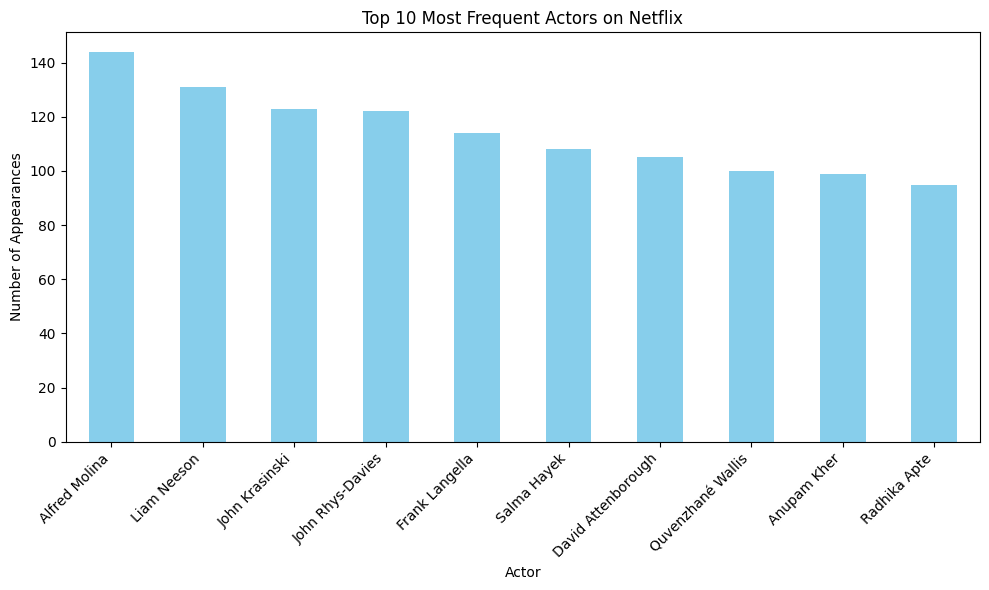

In [20]:
df = pd.read_csv('/content/exploded_cast_dataset.csv')
top_actors = df['cast'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_actors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


ANALYTICAL ANSWER: The data reveals a strong concentration of actors in Netflix content, with leading the list. This suggests Netflix is heavily investing in Indian productions, likely to strengthen its presence in the South Asian market and cater to a growing regional audience.